# Coronavirus Statistics

created: March 8, 2020

Data accessed from:
**Open access epidemiological data from the COVID-19 outbreak*** (Xu, Kraemer 2019) https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30119-5/fulltext#%20

An up-to-date source: https://www.worldometers.info/coronavirus/#countries

An interesting review of mathematical models in epidemiology:

**The Mathematics of Infectious Diseases** (Hethcote, 2000)
https://epubs.siam.org/doi/pdf/10.1137/S0036144500371907

In [56]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime

import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit
from copy import copy

import matplotlib.ticker as ticker
from itertools import cycle



In [3]:
pwd

'/Users/jacobportes/Documents/Code/Coronavirus'

In [7]:
# Convert string to datetime format
def convert_date(x):
    xx = datetime.strptime(x, '%d.%m.%Y')
    return xx

# Exponential function with 3 parameters
def exp_func(x,a,b,c):
    y = a*np.exp(b*x+c)
    return y

An example of how datetime works:

In [2]:
dt1 = datetime.strptime('22.01.2020', '%d.%m.%Y')
dt2 = datetime.strptime('25.01.2020', '%d.%m.%Y')
dt2 > dt1

True

Read excel file of confirmed cases outside of Hubai

In [4]:
df = pd.read_excel(r'COVID19_2020_open_line_list.xlsx')

In [5]:
df.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,admin_id,data_moderator_initials,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,1,30,male,"Chaohu City, Hefei City",Anhui,China,1,31.646960,117.716600,admin3,...,340181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,47,male,"Baohe District, Hefei City",Anhui,China,1,31.778630,117.331900,admin3,...,340111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,49,male,"High-Tech Zone, Hefei City",Anhui,China,1,31.828313,117.224844,point,...,340104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,47,female,"High-Tech Zone, Hefei City",Anhui,China,1,31.828313,117.224844,point,...,340104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,50,female,"Feidong County, Hefei City",Anhui,China,1,32.001230,117.568100,admin3,...,340122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_us = df[(df.country == 'United States')] # & (df.sex == 'Male')
df_us.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,admin_id,data_moderator_initials,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
661,668,60,female,Chicago,Illinois,United States,1,41.87810,-87.6298,point,...,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,669,35,male,Snohomish County,Washington,United States,1,48.04818,-121.6960,admin2,...,2988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,677,50,male,Orange County,California,United States,1,33.70329,-117.7610,admin2,...,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058,1065,NaN,NaN,Los Angeles,California,United States,1,34.05000,-118.2500,point,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1059,1066,NaN,NaN,"Tempe, Maricopa County",Arizona,United States,1,33.41278,-111.9430,point,...,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_iran = df[(df.country == 'Iran')]
conf = df_iran['date_confirmation' ]
conf.apply(convert_date).sort_values()

cumsum = []
val=0

# calculate cumulative sum 
for d in conf.unique():
    # count cases each day
    val += np.sum(len(np.where(conf.str.find(d)==0)[0])) # this is ugly - probably better way to do this
    cumsum.append(val)
    
# fit curve
x = np.arange(len(cumsum))
(a,b,c),_ = curve_fit(exp_func, x, cumsum,  p0=(4, 0.1,20))

Text(0.5, 1.0, 'Iran cumulative cases')

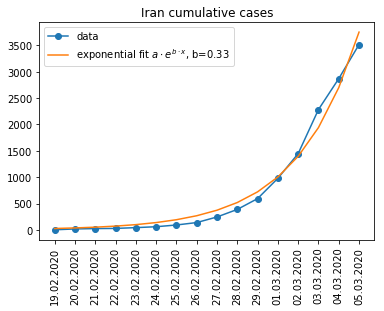

In [13]:
plt.plot(conf.unique(),cumsum,'o-')
plt.xticks(rotation=90)
plt.plot(conf.unique(),exp_func(x,a,b,c))
plt.legend(['data',r'exponential fit $a \cdot e^{b \cdot x}$,'+' b='+str(np.round(b,3))])
plt.title('Iran cumulative cases')

One problem with this is that it won't work if the dates are not evenly space - this should be addressed

## Let's do this for a few countries

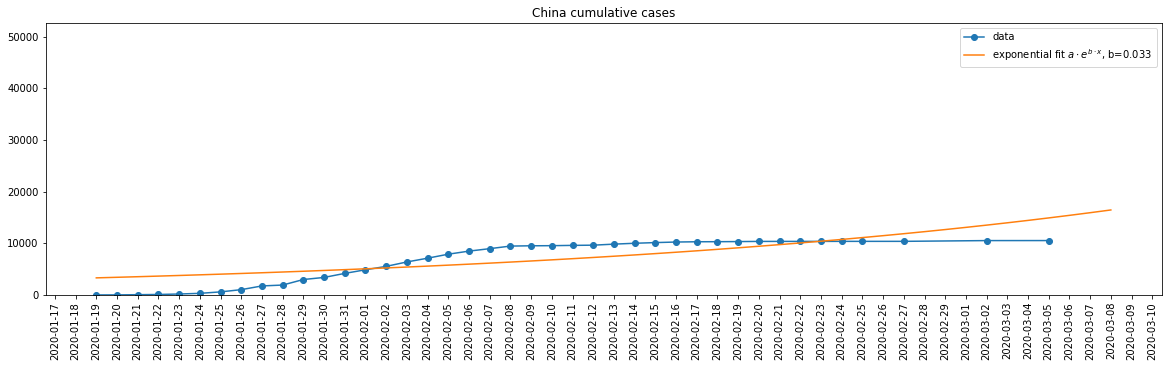

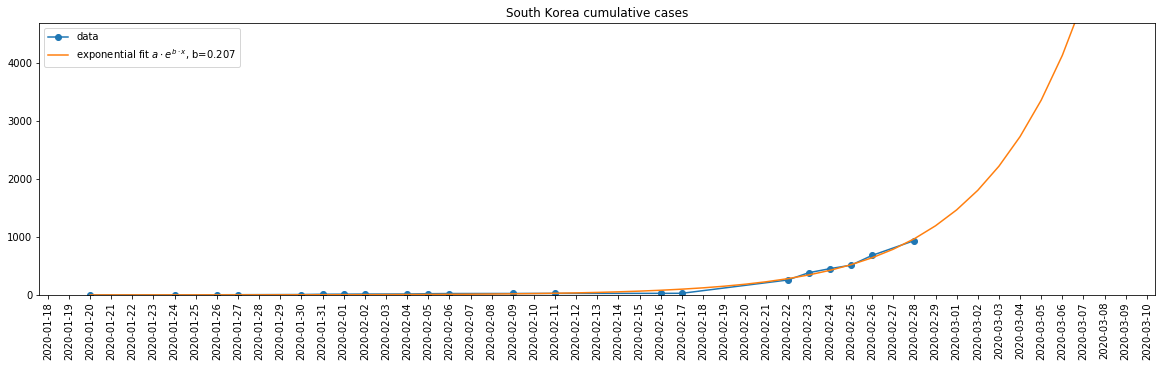

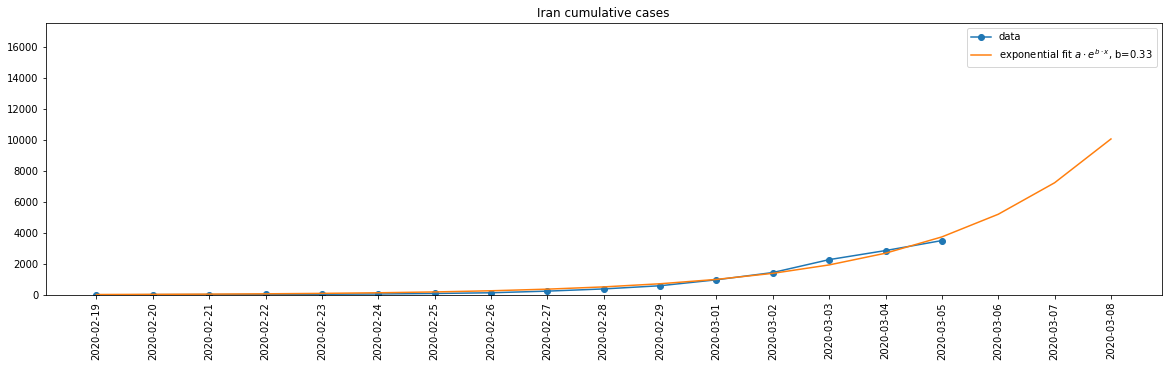

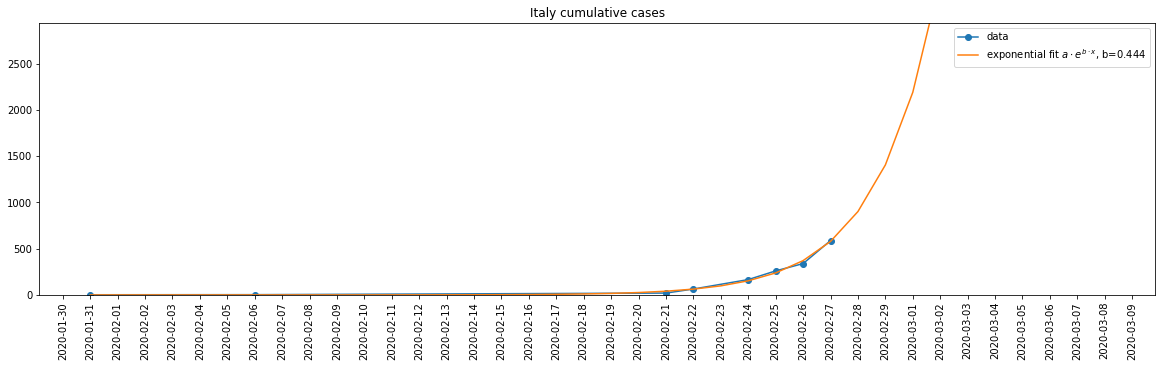

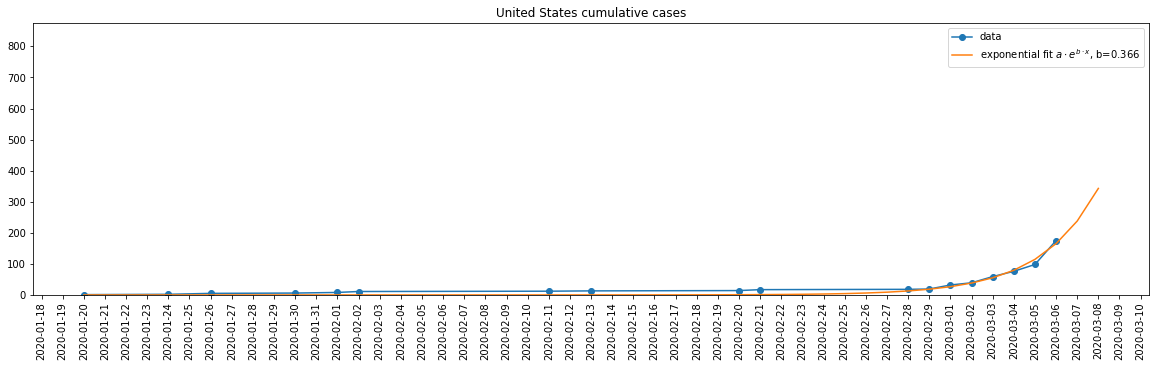

In [39]:
countries = ['China','South Korea','Iran','Italy','United States']

tick_spacing = 1

for cn in countries:
    
    conf = copy(df[(df.country == cn)]['date_confirmation'])
    conf.dropna(inplace = True) # inplace = True
    conf=conf.apply(convert_date) #.sort_values() # sort_values doesn't seem to work
    conf=conf.sort_values()

    dates = conf.unique().astype('datetime64[D]')
    
    # dates until today
    dates_all = np.arange(np.min(dates),datetime.today(),dtype='datetime64[D]')
    # only use dates shared between spreadsheet and dates up until today
    # (this removes erroneous dates from 2022 etc.)
    dates = np.intersect1d(dates,dates_all)

    cumsum = []
    val=0
    for d in dates:
        # count cases each day
        val += np.sum(len(np.where(conf==d)[0])) # this is ugly - probably better way to do this
        cumsum.append(val)
        
    # fit curve
    x = np.arange(len(dates_all))
    
    ind = []
    for d in dates:
        #if np.where(dates_all==d)[0].shape[0] >0:
        ind.append(np.where(dates_all==d)[0][0])
        
    x = np.arange(len(dates_all))
    y = np.interp(x,x[ind],cumsum)
    
    (a,b,c),_ = curve_fit(exp_func, x[ind], cumsum,  p0=(4, 0.1,20),maxfev=100000)
    
    fig,ax =  plt.subplots(1,1,figsize=(20,5))
    ax.plot(dates,cumsum,'o-')
    
    plt.xticks(rotation=90)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.plot(dates_all,exp_func(x,a,b,c))
    ax.legend(['data',r'exponential fit $a \cdot e^{b \cdot x}$,'+' b='+str(np.round(b,3))])
    ax.set_title(cn+' cumulative cases')
    ax.set_ylim((0,5*np.max(cumsum)))

[ 0  4  6  7 10 11 12 13 15 16 17 20 22 27 28 33 34 35 36 37 39 48]
2.7794170633674393 0.2220003896636538 -2.771693127742051
['2020-01-31' '2020-02-06' '2020-02-21' '2020-02-22' '2020-02-24'
 '2020-02-25' '2020-02-26' '2020-02-27' '2020-03-04']
[ 0  6 21 22 24 25 26 27 33 36]
[ 0  6 21 22 24 25 26 27 33 36 37]
3.0225867164464133 0.2687051853714761 -2.1281909208329335
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]
4.786966311084054 0.2908990711309187 2.2154860035872557
[ 0  4  6 10 12 13 22 24 31 32 39 40 41 42 43 44 45 46 47]
[ 0  4  6 10 12 13 22 24 31 32 39 40 41 42 43 44 45 46 47 48]
0.00010226599436357856 0.5143377350673628 -9.011303431705311


(-500, 20000)

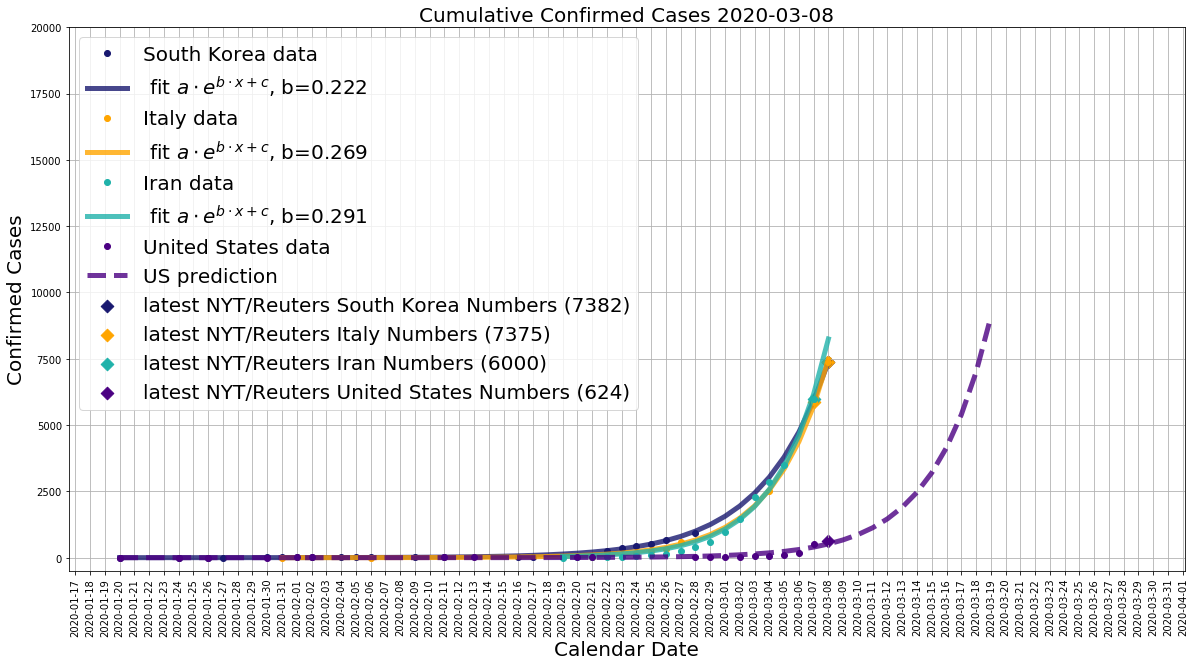

In [116]:
colors = cycle(['midnightblue','orange','lightseagreen','indigo'])
countries = ['South Korea','Italy','Iran','United States']

fig,ax =  plt.subplots(1,1,figsize=(20,10))

fits = {}

for cn in countries:
    
    col= next(colors)
    
    conf = copy(df[(df.country == cn)]['date_confirmation'])
    conf.dropna(inplace = True) # inplace = True
    conf=conf.apply(convert_date) #.sort_values() # sort_values doesn't seem to work
    conf=conf.sort_values()

    dates = conf.unique().astype('datetime64[D]')
    
    dates_all = np.arange(np.min(dates),datetime.today(),dtype='datetime64[D]')
    # only use dates shared between spreadsheet and dates up until today
    # (this removes erroneous dates from 2022 etc.)
    dates = np.intersect1d(dates,dates_all)

    cumsum = []
    val=0
    for d in dates:
        # count cases each day
        val += np.sum(len(np.where(conf==d)[0])) # this is ugly - probably better way to do this
        cumsum.append(val)
        
    # fit curve
    x = np.arange(len(dates_all))
    
    ind = []
    for d in dates:
        ind.append(np.where(dates_all==d)[0][0])

    if cn =='South Korea':
        
        # https://www.reuters.com/article/us-health-coronavirus-southkorea-cases/south-korea-reports-69-new-coronavirus-cases-total-7382-kcdc-idUSKBN20W03W
        cumsum=np.append(cumsum,7382)
        ind = np.append(ind,np.where(dates_all==np.datetime64(datetime.strptime('Mar 8 2020', '%b %d %Y')))[0][0])
        print(ind)
        dates = np.append(dates,dates_all[ind[-1]])
        
        insert = 1
        ax.scatter(dates[-insert:],cumsum[-insert:],s=80,marker='D',color=col,label='latest NYT/Reuters '+cn +' Numbers ('+ str(cumsum[-1])+ ')')


        
    if cn == 'Italy':
        # add two more data point from NYT
        # https://www.nytimes.com/2020/03/09/world/coronavirus-news.html
        cumsum=np.append(cumsum,2500)
        ind = np.append(ind,np.where(dates_all==np.datetime64(datetime.strptime('Mar 4 2020', '%b %d %Y')))[0][0])
        dates = np.append(dates,dates_all[ind[-1]])
        print(dates)
        
        # https://www.bbc.com/news/world-middle-east-51783242
        cumsum=np.append(cumsum,5883)
        ind = np.append(ind,np.where(dates_all==np.datetime64(datetime.strptime('Mar 7 2020', '%b %d %Y')))[0][0])
        print(ind)
        dates = np.append(dates,dates_all[ind[-1]])

        # https://www.nytimes.com/2020/03/09/world/coronavirus-news.html
        cumsum=np.append(cumsum,7375)
        ind = np.append(ind,np.where(dates_all==np.datetime64(datetime.strptime('Mar 8 2020', '%b %d %Y')))[0][0])
        print(ind)
        dates = np.append(dates,dates_all[ind[-1]])
        
        insert = 2
        ax.scatter(dates[-insert:],cumsum[-insert:],s=80,marker='D',color=col,label='latest NYT/Reuters '+cn +' Numbers ('+ str(cumsum[-1])+ ')')

    if cn =='Iran':
        
        # https://www.bbc.com/news/world-middle-east-51783242
        cumsum=np.append(cumsum,6000)
        ind = np.append(ind,np.where(dates_all==np.datetime64(datetime.strptime('Mar 7 2020', '%b %d %Y')))[0][0])
        print(ind)
        dates = np.append(dates,dates_all[ind[-1]])
        
        insert = 1
        ax.scatter(dates[-insert:],cumsum[-insert:],s=80,marker='D',color=col,label='latest NYT/Reuters '+cn +' Numbers ('+ str(cumsum[-1])+ ')' )


        
        
    if cn =='United States':
        
        # https://www.reuters.com/article/us-health-coronavirus-southkorea-cases/south-korea-reports-69-new-coronavirus-cases-total-7382-kcdc-idUSKBN20W03W
        cumsum=np.append(cumsum,500)
        ind = np.append(ind,np.where(dates_all==np.datetime64(datetime.strptime('Mar 7 2020', '%b %d %Y')))[0][0])
        print(ind)
        dates = np.append(dates,dates_all[ind[-1]])
        
        # https://www.worldometers.info/coronavirus/#countries
        cumsum=np.append(cumsum,624)
        ind = np.append(ind,np.where(dates_all==np.datetime64(datetime.strptime('Mar 8 2020', '%b %d %Y')))[0][0])
        print(ind)
        dates = np.append(dates,dates_all[ind[-1]])
        
        insert = 1
        ax.scatter(dates[-insert:],cumsum[-insert:],s=80,marker='D',color=col,label='latest NYT/Reuters '+cn +' Numbers ('+ str(cumsum[-1])+ ')' )


        
    x = np.arange(len(dates_all))
    y = np.interp(x,x[ind],cumsum)
    
    (a,b,c),_ = curve_fit(exp_func, x[ind], cumsum,  p0=(4, 0.2,0),bounds=[(0,0,-10),(10,2,10)],maxfev=1000)
    print(a,b,c)
    
    fits[cn] = {}
    fits[cn]['a'] = a
    fits[cn]['b'] = b
    fits[cn]['c'] = c
    
    
    ax.plot(dates,cumsum,'o',label=cn+' data',color = col,linewidth = 5)
    
    #ax.plot(dates_all,y,'x-') #interpolated
    
    plt.xticks(rotation=90)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    if cn != 'United States':
        ax.plot(dates_all,exp_func(x,a,b,c),alpha=0.8,color=col,linewidth = 5,label=r' fit $a \cdot e^{b \cdot x+c}$,'+' b='+str(np.round(b,3))) # +' c='+str(np.round(c,3))
    

    
    
# US prediction
a_av = (fits['Italy']['a'] + fits['Iran']['a'] + fits['South Korea']['a'])/3
b_av = (fits['Italy']['b'] + fits['Iran']['b'] + fits['South Korea']['b'])/3
#c_av = (fits['Italy']['c'] + fits['Iran']['c'] + fits['South Korea']['c'])/3

(a,b,c),_ = curve_fit(exp_func, x[ind], cumsum,  p0=(4, b_av,0),bounds=[(0,b_av,-50),(10,b_av+.00001,10)],maxfev=1000)


dates_pred = np.arange(np.min(dates),datetime.strptime('Mar 20 2020', '%b %d %Y'),dtype='datetime64[D]')
x_pred = np.arange(len(dates_pred))
ax.plot(dates_pred,exp_func(x_pred,a_av,b_av,c),'--',alpha=0.8,color=col,linewidth = 5,label='US prediction') # +' c='+str(np.round(c,3))



# format figure

ax.legend(fontsize=20)
ax.set_title('Cumulative Confirmed Cases '+str(dates_all[-1]),fontsize=20)

ax.set_xlabel('Calendar Date',fontsize=20)
ax.set_ylabel('Confirmed Cases',fontsize=20)
ax.grid(which='both')
ax.set_ylim((-500,20000))


In [72]:
dates

array(['2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05'],
      dtype='datetime64[D]')

In [349]:
len(dates_all)

38

In [341]:
np.where(dates_all==np.datetime64(datetime.strptime('Mar 4 2020', '%b %d %Y')))[0]

np.where(dates_all==np.datetime64(datetime.strptime('Mar 4 2020', '%b %d %Y')))[0][0]

33

In [331]:
dates_all

array(['2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
       '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
       '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
       '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15',
       '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
       '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
       '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
       '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
       '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
       '2020-03-07', '2020-03-08'], dtype='datetime64[D]')

In [336]:
datetime.strptime('Mar 4 2020', '%b %d %Y').date()

datetime.date(2020, 3, 4)

In [310]:
np.append(dates,dates_all[-1])

array(['2020-01-31', '2020-02-06', '2020-02-21', '2020-02-22',
       '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
       '2020-03-08'], dtype='datetime64[D]')

In [295]:
y[-1]=999
np.append(y,999)

array([  2.        ,   2.16666667,   2.33333333,   2.5       ,
         2.66666667,   2.83333333,   3.        ,   4.13333333,
         5.26666667,   6.4       ,   7.53333333,   8.66666667,
         9.8       ,  10.93333333,  12.06666667,  13.2       ,
        14.33333333,  15.46666667,  16.6       ,  17.73333333,
        18.86666667,  20.        ,  64.        , 115.        ,
       166.        , 260.        , 339.        , 588.        ,
       588.        , 588.        , 588.        , 588.        ,
       588.        , 588.        , 588.        , 588.        ,
       588.        , 999.        , 999.        ])

In [258]:
ind = []
for d in dates:
    ind.append(np.where(dates_all==d)[0][0])
ind
x = np.arange(len(dates_all))
y = np.interp(x,x[ind],cumsum)

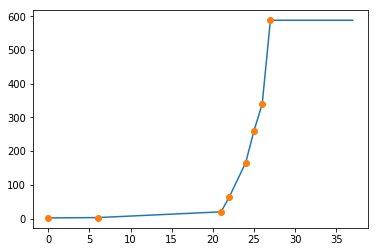

In [261]:
plt.plot(x,y)
plt.plot(x[ind],cumsum,'o')

In [233]:
dates

array(['2020-01-20', '2020-01-24', '2020-01-26', '2020-01-30',
       '2020-02-01', '2020-02-02', '2020-02-11', '2020-02-13',
       '2020-02-20', '2020-02-21', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-06-03', '2021-03-06',
       '2022-03-06'], dtype='datetime64[D]')

In [218]:
np.where(dates == np.datetime64('2020-02-13T00:00:00.000000000'))[0][0]

7

In [185]:
datetime.today()

datetime.datetime(2020, 3, 9, 0, 41, 51, 254206)

In [190]:
dates2=[]
for d in dates:
    dates2.append(datetime.strptime(d,'%d.%m.%Y'))
dates2
np.arange(np.min(dates2),datetime.today(),dtype='datetime64[D]')

array(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
       '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
       '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
       '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
       '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
       '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
       '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
       '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
       '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
       '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
       '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
       '2020-03-08'], dtype='datetime64[D]')

In [200]:
conf = copy(df[(df.country == 'Israel')]['date_confirmation'])
conf.dropna(inplace = True)
conf = conf.apply(convert_date)
conf

13125   2020-02-27
13133   2020-02-21
13134   2020-02-23
13135   2020-02-28
13393   2020-03-02
13394   2020-03-02
13395   2020-03-01
13396   2020-03-01
13397   2020-03-01
14612   2020-03-02
14613   2020-03-02
Name: date_confirmation, dtype: datetime64[ns]

In [194]:
dd = pd.Series(dates)
dd.apply(convert_date)

0    2020-01-20
1    2020-01-24
2    2020-01-26
3    2020-01-30
4    2020-02-01
5    2020-02-02
6    2020-02-11
7    2020-02-13
8    2020-02-20
9    2020-02-21
10   2020-02-28
11   2020-02-29
12   2020-03-01
13   2020-03-02
14   2020-03-03
15   2020-03-04
16   2020-03-05
17   2020-03-06
18   2020-06-03
19   2021-03-06
20   2022-03-06
dtype: datetime64[ns]

In [164]:

df_israel = df[(df.country == 'Israel')]
print(df_israel['date_confirmation'])
series = df_israel['date_confirmation']
#series.set_index('date_confirmation')
print(series)
series.index = pd.to_datetime(series.index,format='%m.%d.%Y',errors='ignore')
print(series)
upsampled = series.resample('D')

df_israel['date_confirmation']

13125    27.02.2020
13133    21.02.2020
13134    23.02.2020
13135    28.02.2020
13393    02.03.2020
13394    02.03.2020
13395    01.03.2020
13396    01.03.2020
13397    01.03.2020
14612    02.03.2020
14613    02.03.2020
Name: date_confirmation, dtype: object
13125    27.02.2020
13133    21.02.2020
13134    23.02.2020
13135    28.02.2020
13393    02.03.2020
13394    02.03.2020
13395    01.03.2020
13396    01.03.2020
13397    01.03.2020
14612    02.03.2020
14613    02.03.2020
Name: date_confirmation, dtype: object
13125    27.02.2020
13133    21.02.2020
13134    23.02.2020
13135    28.02.2020
13393    02.03.2020
13394    02.03.2020
13395    01.03.2020
13396    01.03.2020
13397    01.03.2020
14612    02.03.2020
14613    02.03.2020
Name: date_confirmation, dtype: object


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [171]:
np.arange('02-2005', '03-2005', dtype='datetime64[D]')

ValueError: Month out of range in datetime string "02-2005"

In [22]:
mm.reset_index()
mm.unique()

array(['19.02.2020', '20.02.2020', '21.02.2020', '22.02.2020',
       '23.02.2020', '24.02.2020', '25.02.2020', '26.02.2020',
       '27.02.2020', '28.02.2020', '29.02.2020', '01.03.2020',
       '02.03.2020', '03.03.2020', '04.03.2020', '05.03.2020'],
      dtype=object)

250

In [24]:
mm

11188    19.02.2020
11189    19.02.2020
11190    20.02.2020
11191    20.02.2020
11192    21.02.2020
11193    21.02.2020
11194    21.02.2020
11195    21.02.2020
11196    21.02.2020
11197    21.02.2020
11198    21.02.2020
13520    20.02.2020
13521    20.02.2020
13522    20.02.2020
13523    20.02.2020
13524    20.02.2020
13525    20.02.2020
13526    20.02.2020
13527    20.02.2020
13528    20.02.2020
13529    20.02.2020
13530    20.02.2020
13531    20.02.2020
13532    20.02.2020
13533    20.02.2020
13534    22.02.2020
13535    22.02.2020
13536    22.02.2020
13537    23.02.2020
13538    23.02.2020
            ...    
17539    03.03.2020
17540    03.03.2020
17541    04.03.2020
17542    04.03.2020
17543    04.03.2020
17544    04.03.2020
17545    04.03.2020
17546    04.03.2020
17547    05.03.2020
17548    05.03.2020
17549    05.03.2020
17550    05.03.2020
17551    05.03.2020
17552    05.03.2020
17553    05.03.2020
17554    04.03.2020
17555    05.03.2020
17556    05.03.2020
17557    04.03.2020
